<a href="https://colab.research.google.com/github/LCaravaggio/NLP/blob/main/05_embeddings/Trainable%20Embeddings%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb as dataset
from tensorflow import keras
#from keras.datasets import reuters as dataset
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Cargamos y analizamos el dataset

In [ ]:
# Primer hyperparámetro
num_words=30000

(training_data, training_targets), (testing_data, testing_targets) = dataset.load_data(num_words=num_words+2)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
word_index = keras.datasets.imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
# Tengo dos categorías: Sentimiento positivo (1) o sentimiento negativo (0)
num_categories = len(np.unique(targets))
print("Categories:", np.unique(targets))
# Tengo num_words palabras únicas en el vocabulario
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 30000


In [ ]:
# Longitudes promedio de los comentarios de las películas
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


# Impresión de comentario preprocesado con su etiqueta

In [ ]:
# Imprimo cometario i'esimo con su clasificación de sentimiento
i = 0
print("Label:", targets[i])
# Las comentarios ya están preprocesados
print(data[i])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# Bajamos diccionario de palabras a indices
index = dataset.get_word_index()
print([f'{k}:{v}' for k,v in index.items()][:100])

['fawn:34701', 'tsukino:52006', 'nunnery:52007', 'sonja:16816', 'vani:63951', 'woods:1408', 'spiders:16115', 'hanging:2345', 'woody:2289', 'trawling:52008', "hold's:52009", 'comically:11307', 'localized:40830', 'disobeying:30568', "'royale:52010", "harpo's:40831", 'canet:52011', 'aileen:19313', 'acurately:52012', "diplomat's:52013", 'rickman:25242', 'arranged:6746', 'rumbustious:52014', 'familiarness:52015', "spider':52016", 'hahahah:68804', "wood':52017", 'transvestism:40833', "hangin':34702", 'bringing:2338', 'seamier:40834', 'wooded:34703', 'bravora:52018', 'grueling:16817', 'wooden:1636', 'wednesday:16818', "'prix:52019", 'altagracia:34704', 'circuitry:52020', 'crotch:11585', 'busybody:57766', "tart'n'tangy:52021", 'burgade:14129', 'thrace:52023', "tom's:11038", 'snuggles:52025', 'francesco:29114', 'complainers:52027', 'templarios:52125', '272:40835', '273:52028', 'zaniacs:52130', '275:34706', 'consenting:27631', 'snuggled:40836', 'inanimate:15492', 'uality:52030', 'bronte:11926', 

In [ ]:
# Armo diccionario reverso: de indices a palabras
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
print([f'{k}:{v}' for k,v in reverse_index.items()][:100])

['34701:fawn', '52006:tsukino', '52007:nunnery', '16816:sonja', '63951:vani', '1408:woods', '16115:spiders', '2345:hanging', '2289:woody', '52008:trawling', "52009:hold's", '11307:comically', '40830:localized', '30568:disobeying', "52010:'royale", "40831:harpo's", '52011:canet', '19313:aileen', '52012:acurately', "52013:diplomat's", '25242:rickman', '6746:arranged', '52014:rumbustious', '52015:familiarness', "52016:spider'", '68804:hahahah', "52017:wood'", '40833:transvestism', "34702:hangin'", '2338:bringing', '40834:seamier', '34703:wooded', '52018:bravora', '16817:grueling', '1636:wooden', '16818:wednesday', "52019:'prix", '34704:altagracia', '52020:circuitry', '11585:crotch', '57766:busybody', "52021:tart'n'tangy", '14129:burgade', '52023:thrace', "11038:tom's", '52025:snuggles', '29114:francesco', '52027:complainers', '52125:templarios', '40835:272', '52028:273', '52130:zaniacs', '34706:275', '27631:consenting', '40836:snuggled', '15492:inanimate', '52030:uality', '11926:bronte', 

In [ ]:
# La review 0 es claramente positiva (target 1)
i=0
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[i]] )
print(data[i])
print()
print(decoded)
print()
print(targets[i])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

# this film was just brilliant casting 

In [ ]:
# La review 1 es claramente negativa (target 0)
i=1
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[i]] )
print(data[i])
print()
print(decoded)
print()
print(targets[i])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 10156, 4, 1153, 9, 194, 775, 7, 8255, 11596, 349, 2637, 148, 605, 15358, 8003, 15, 123, 125, 68, 23141, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 25249, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]

# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've

In [ ]:
data.shape

(50000,)

In [ ]:
lens=[len(x) for x in data]

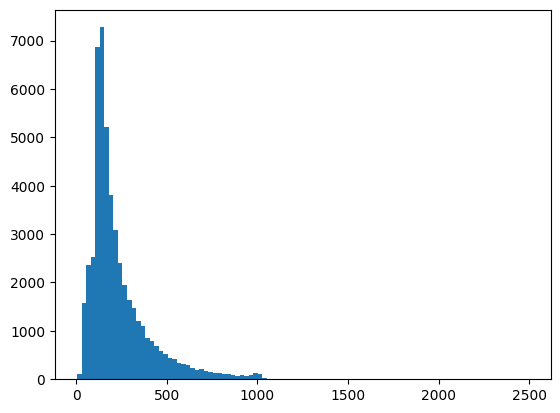

In [ ]:
from matplotlib import pyplot as plt
plt.hist(lens, bins=100)
plt.show()

# Padding y formateo de data para entrenar

In [ ]:
# Hyperparametro - Longitud máxima de comentario
maxlen=1000

In [ ]:
# Padding es una función de Keras que me sirve para convertir los datos en una matriz
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences
data = pad_sequences(data,maxlen=maxlen)

In [ ]:
data.shape

(50000, 1000)

In [ ]:
# Verificamos que todos tengan longitud 1000
print(len(data[0]))
print(np.array([len(d) for d in data]).var())

1000
0.0


# Armar una MLP con one-hot encoding para resolver el problema

Lo primero que se podría pensar es en armar one-hot encoding para las 30mil palabras. Eso genera una matríz con 30mil columnas para cada uno de las 50mil reseñas. Es grande pero manejable. El problema es que al hacer eso pierdo el ordenamiento de las palabras. Podría entonces armar un esquema de one-hot encoding en el que para cada una de las 1000 palabras de la review indique si aparece alguna de las 30mil palabras. 

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
# usar maxlen y num_words para calcular la entrada
# Utilizar una sola capa
model = Sequential()
## TODO
salida_densa = 1
input_shape = (1,num_words*maxlen)
model.add(Dense(salida_densa, input_shape=input_shape, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 1)              30000001  
                                                                 
Total params: 30,000,001
Trainable params: 30,000,001
Non-trainable params: 0
_________________________________________________________________


## ¿Por que no es viable esta red?

# Armar Embeddings usando una MLP

In [ ]:
from tensorflow.keras.layers import Embedding, Flatten, Dropout, GlobalAveragePooling1D
from tensorflow.keras import optimizers

In [ ]:
# Cantidad de palabras totales contando las reservadas
nb_words=num_words+3
# Tamano del embedding. Es un hiperparámetro y puede modificarlo
embed_dim=32
salida_capa_densa = 1
dropout=0.5 # Hiperparámetro

model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length=1000, trainable=True))
model.add(GlobalAveragePooling1D())
model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 32)          960096    
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 960,129
Trainable params: 960,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# MODIFIQUE HYPERPARAMS A GUSTO
from tensorflow.keras.optimizers.legacy import Adam
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
model.fit(data,targets,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6652 - accuracy: 0.6557 - val_loss: 0.6100 - val_accuracy: 0.7966
Epoch 2/5
1250/1250 [==============================] - 13s 11ms/step - loss: 0.5333 - accuracy: 0.8126 - val_loss: 0.4686 - val_accuracy: 0.8457
Epoch 3/5
1250/1250 [==============================] - 14s 11ms/step - loss: 0.4163 - accuracy: 0.8610 - val_loss: 0.3808 - val_accuracy: 0.8729
Epoch 4/5
1250/1250 [==============================] - 14s 11ms/step - loss: 0.3463 - accuracy: 0.8827 - val_loss: 0.3297 - val_accuracy: 0.8849
Epoch 5/5
1250/1250 [==============================] - 14s 11ms/step - loss: 0.3038 - accuracy: 0.8937 - val_loss: 0.3003 - val_accuracy: 0.8897


In [ ]:
model.layers[0].get_weights()[0].shape

(30003, 32)

In [ ]:
embeddings=model.layers[0].get_weights()[0][:500,:]

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(embeddings)

In [ ]:
X_embedded.shape

(500, 2)

In [ ]:
index['good']

49

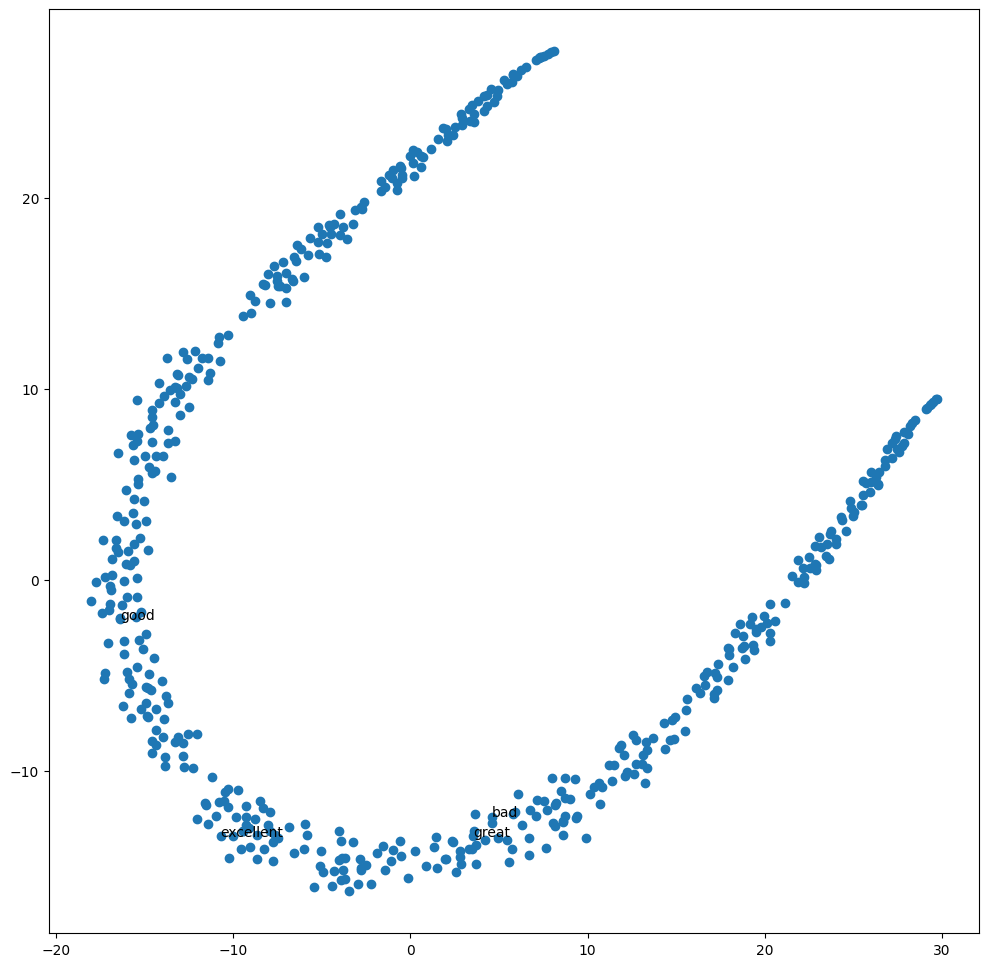

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
words=['good', 'bad', 'great', 'excellent']
plt.scatter(X_embedded[:,0],X_embedded[:,1])
for word in words:
  idx=index[word]
  plt.text(X_embedded[idx,0], X_embedded[idx,1], word)
plt.show()

In [ ]:
index['good']

49

In [ ]:
reverse_index[49]

'good'

In [ ]:
test_data=np.arange(500).reshape(-1,1)

In [ ]:
test_data.shape

(500, 1)

In [ ]:
test_data=pad_sequences(test_data,maxlen=maxlen)

In [ ]:
y_pred_test=model.predict(test_data)

16/16 [==============================] - 0s 2ms/step


In [ ]:
words1=y_pred_test.flatten().argsort()[:250]
words2=y_pred_test.flatten().argsort()[-250:]

# Armar una CNN
Abajo hay un ejemplo de arquitectur

In [ ]:
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding_12 (Embedding)     (None, 1000, 32)          960096    
# _________________________________________________________________
# conv1d_7 (Conv1D)            (None, 1000, 64)          14400     
# _________________________________________________________________
# max_pooling1d_4 (MaxPooling1 (None, 500, 64)           0         
# _________________________________________________________________
# conv1d_8 (Conv1D)            (None, 500, 128)          57472     
# _________________________________________________________________
# global_max_pooling1d_4 (Glob (None, 128)               0         
# _________________________________________________________________
# dropout_4 (Dropout)          (None, 128)               0         
# _________________________________________________________________
# dense_19 (Dense)             (None, 46)                5934      
# =================================================================

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [ ]:
# Cantidad de palabras totales contando las reservadas
nb_words=num_words+3
#Tamaño del embedding. Es un hiperparámetro y se puede modificar
embed_dim=32
salida_capa_densa=1
dropout=0.3 #hiperparámetro

model=Sequential()
model.add(Embedding(nb_words, embed_dim, input_length=1000, trainable=True))
model.add(Conv1D(64,5, activation='relu', padding='same'))
model.add(MaxPooling1D())
model.add(Conv1D(128,5, activation='relu', padding='same'))
model.add(MaxPooling1D())
model.add(Flatten())
#model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='sigmoid'))

In [ ]:
# MODIFIQUE HYPERPARAMS A GUSTO
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# No entrenar este modelo en clase, tarda unos 30 minutos
model.fit(data,targets,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 208s 166ms/step - loss: 0.3218 - accuracy: 0.8461 - val_loss: 0.2167 - val_accuracy: 0.9140
Epoch 2/10
1250/1250 [==============================] - 200s 160ms/step - loss: 0.1399 - accuracy: 0.9491 - val_loss: 0.2284 - val_accuracy: 0.9094
Epoch 3/10
1250/1250 [==============================] - 200s 160ms/step - loss: 0.0685 - accuracy: 0.9761 - val_loss: 0.3014 - val_accuracy: 0.9015
Epoch 4/10
1250/1250 [==============================] - 209s 167ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.4317 - val_accuracy: 0.9017
Epoch 5/10
1250/1250 [==============================] - 200s 160ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.5551 - val_accuracy: 0.8950
Epoch 6/10
1250/1250 [==============================] - 201s 161ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.5948 - val_accuracy: 0.8961
Epoch 7/10
1250/1250 [==============================] - 199s 159ms/step - loss: 0.0124 - accuracy: 0.9963 - val_

In [ ]:
model.layers[0].get_weights()[0].shape

(30003, 32)

In [ ]:
embeddings=model.layers[0].get_weights()[0][:500,:]

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(embeddings)

In [ ]:
X_embedded.shape

(500, 2)

In [ ]:
index['good']

49

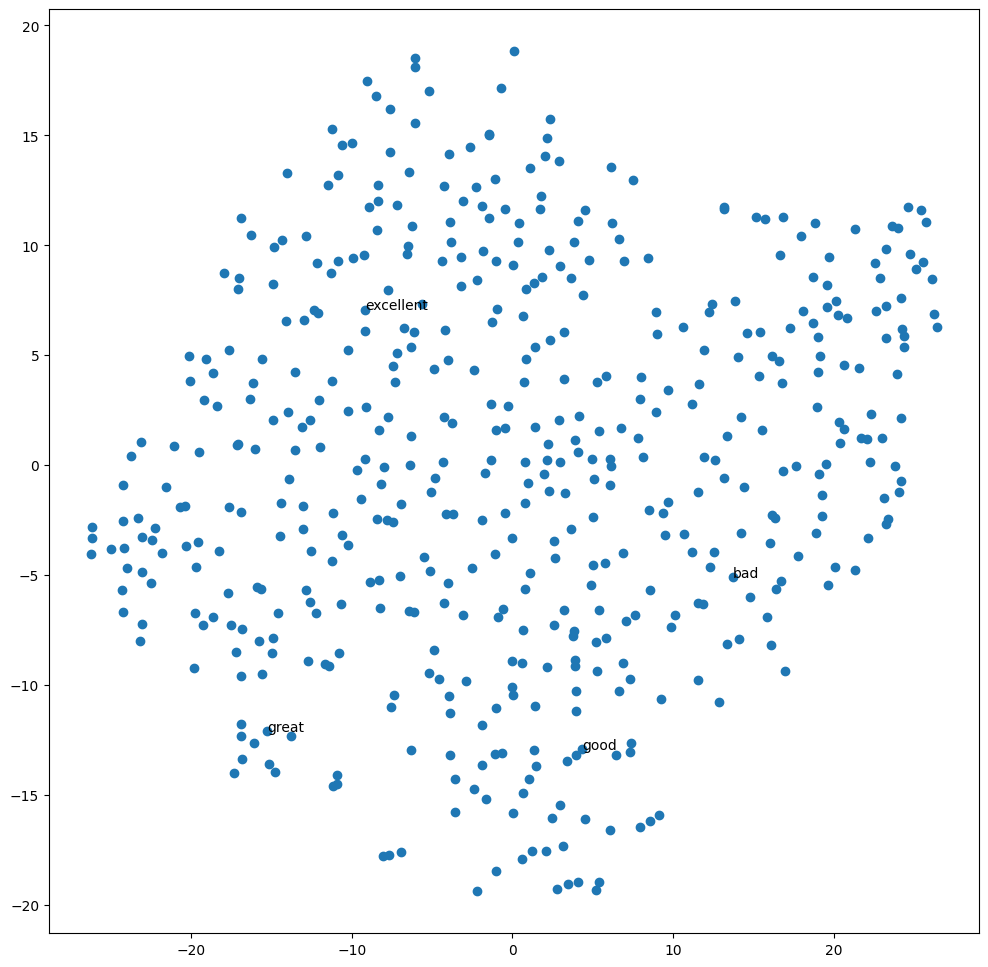

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
words=['good', 'bad', 'great', 'excellent']
plt.scatter(X_embedded[:,0],X_embedded[:,1])
for word in words:
  idx=index[word]
  plt.text(X_embedded[idx,0], X_embedded[idx,1], word)
plt.show()

# Attention

In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Input, Concatenate,Dot,RepeatVector,TimeDistributed,Multiply,Lambda,Flatten,Activation,Reshape
import tensorflow.keras.backend as K
from tensorflow.keras.activations import softmax
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

def softMaxOverTime(x):
    return softmax(x,axis=1)

key_dim=50
nb_words=num_words+3
num_filters=64
input_layer = Input(shape=(maxlen,))
embedding_layer=Embedding(nb_words, embed_dim,  input_length=maxlen, trainable=True)(input_layer)
dense_input=Dense(key_dim,activation="tanh")(embedding_layer)
ulog_attention=Dense(1,activation="linear")(dense_input)
attention=Activation(softMaxOverTime)(ulog_attention)
repeated_attention=TimeDistributed(RepeatVector(embed_dim))(attention)
repeated_attention=Reshape([maxlen,embed_dim])(repeated_attention)
weighted_embeddings=Multiply()([repeated_attention,embedding_layer])
embedding_sum = Lambda(lambda x: K.sum(x, axis=1))(weighted_embeddings)
dense1=Dense(32, activation='relu')(embedding_sum)
dense2=Dense(1, activation='sigmoid')(dense1)
model=Model(input_layer , dense2)
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
model.fit(data,targets,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.3546 - accuracy: 0.8363 - val_loss: 0.2554 - val_accuracy: 0.8972
Epoch 2/10
1250/1250 [==============================] - 39s 31ms/step - loss: 0.1930 - accuracy: 0.9269 - val_loss: 0.2399 - val_accuracy: 0.9034
Epoch 3/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.1253 - accuracy: 0.9567 - val_loss: 0.2659 - val_accuracy: 0.8999
Epoch 4/10
1250/1250 [==============================] - 39s 31ms/step - loss: 0.0821 - accuracy: 0.9745 - val_loss: 0.3218 - val_accuracy: 0.8953
Epoch 5/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.0541 - accuracy: 0.9843 - val_loss: 0.4112 - val_accuracy: 0.8853
Epoch 6/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.0349 - accuracy: 0.9902 - val_loss: 0.4906 - val_accuracy: 0.8792
Epoch 7/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.0216 - accuracy: 0.9939 - val_loss: 0.5608 -

In [ ]:
model.layers[1].get_weights()[0].shape

(30003, 32)

In [ ]:
embeddings=model.layers[1].get_weights()[0][:500,:]

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(embeddings)

In [ ]:
X_embedded.shape

(500, 2)

In [ ]:
index['good']

49

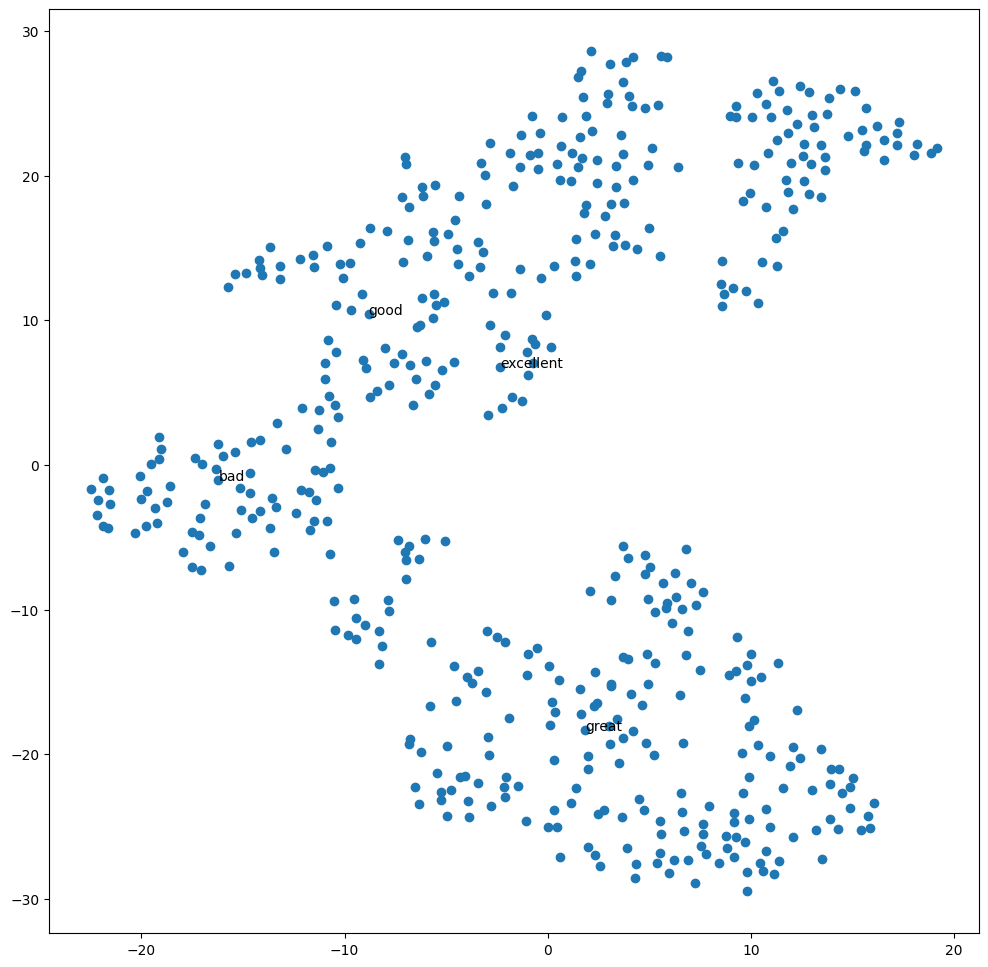

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
words=['good', 'bad', 'great', 'excellent']
plt.scatter(X_embedded[:,0],X_embedded[:,1])
for word in words:
  idx=index[word]
  plt.text(X_embedded[idx,0], X_embedded[idx,1], word)
plt.show()